In [1]:
pip install 'numpy<2.3'

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [2]:
pip install shap

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 1.3 MB/s eta 0:00:02
   ----------- ---------------------------- 0.8/2.8 MB 1.3 MB/s eta 0:00:02
   -------------- ------------------------- 1.0/2.8 MB 1.4 MB/s eta 0:00:02
   ------------------ --------------------- 1.3/2.8 MB 1.4 MB/s eta 0:00:02
   ------------------------- -------------- 1.8/2.8 MB 1.5 MB/s eta 0:00:01
   ----------------------------- ---------- 2

  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install lime

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283918 sha256=fdfd2a57533f035f44f9964e576d58083dcb714ae99f416e8c4fecfab954cde9
  Stored in directory: c:\users\abhilasha\appdata\local\pip\cache\wheels\e7\5d\0e\4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Order of Steps:

- Load & Clean Data
- Exploratory Data Analysis (EDA)
    - Class distribution
    - Time & amount histograms
    - Correlation matrix
- Preprocessing
    - Feature scaling
    - Train-test split
- Model Training (Logistic Regression)
- Evaluation & Visualization
- Interpretability (SHAP, LIME)

Load Data

In [5]:
import pandas as pd

df = pd.read_csv("creditcard.csv")
df = df.drop_duplicates()


Exploratory Data Analysis

1.Class Distribution

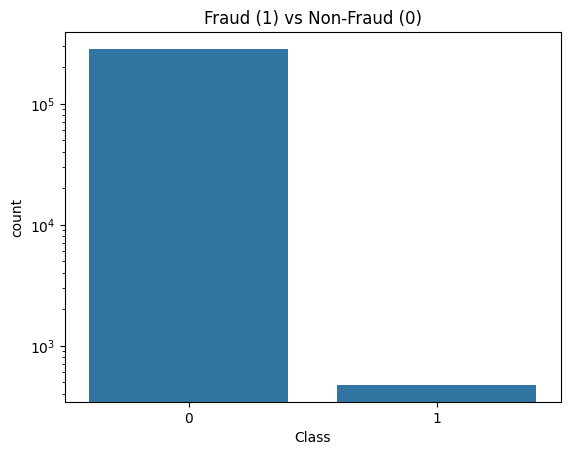

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title("Fraud (1) vs Non-Fraud (0)")
plt.show()


2. Time & amount histograms

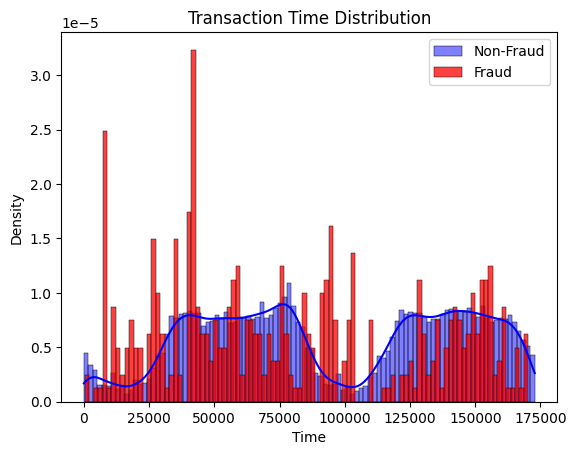

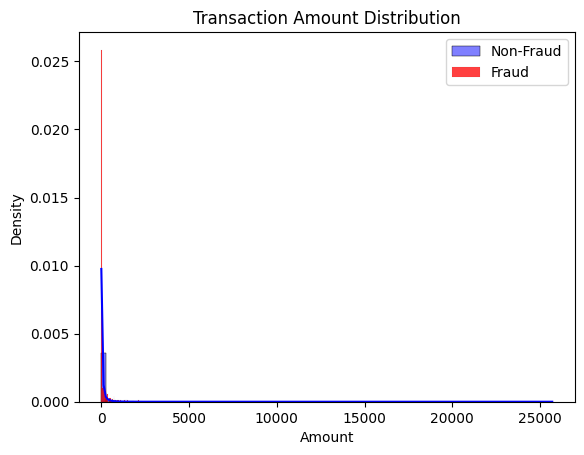

In [7]:
# Time distribution
sns.histplot(df[df['Class'] == 0]['Time'], bins=100, color='blue', label='Non-Fraud', stat='density', kde=True)
sns.histplot(df[df['Class'] == 1]['Time'], bins=100, color='red', label='Fraud', stat='density', kde=False)
plt.title("Transaction Time Distribution")
plt.legend()
plt.show()

# Amount distribution
sns.histplot(df[df['Class'] == 0]['Amount'], bins=100, color='blue', label='Non-Fraud', stat='density', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=100, color='red', label='Fraud', stat='density', kde=False)
plt.title("Transaction Amount Distribution")
plt.legend()
plt.show()


Correlation Matrix (Heatmap)

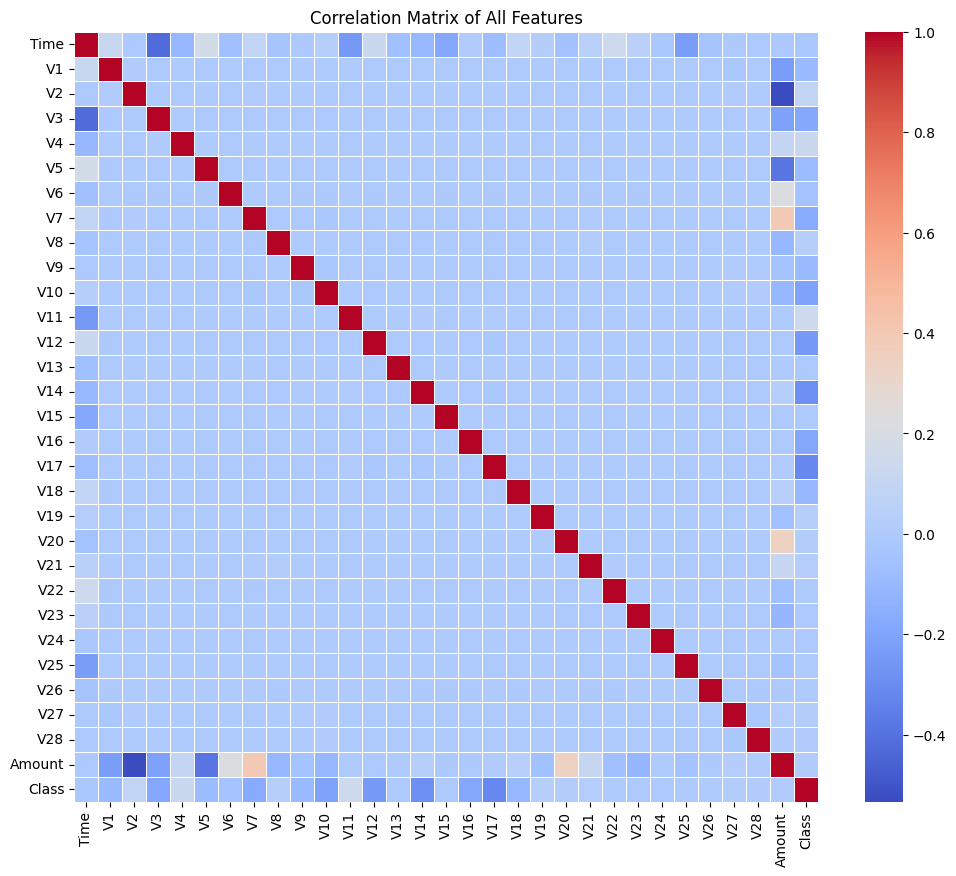

In [8]:
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap of top correlated features with 'Class'
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Features")
plt.show()


Correlation with Target Class Only

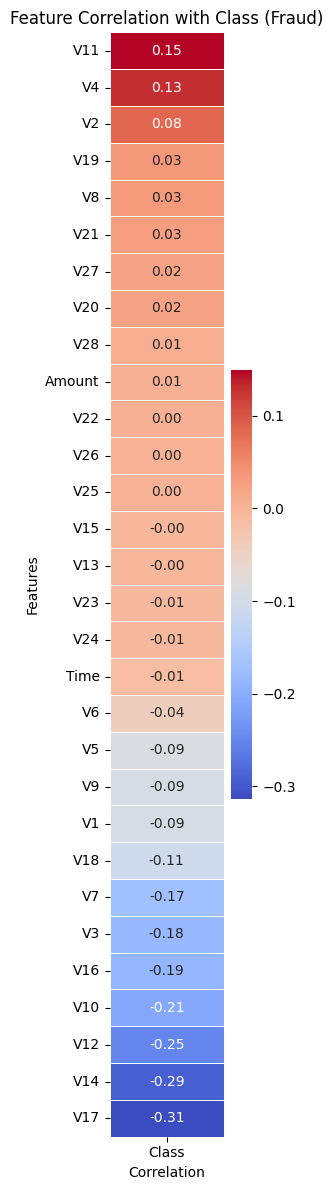

In [9]:
# Correlation of features with 'Class'
corr_with_class = corr_matrix["Class"].drop("Class").sort_values(ascending=False)

# Plot vertical heatmap
plt.figure(figsize=(3, 12))
sns.heatmap(corr_with_class.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)
plt.title("Feature Correlation with Class (Fraud)")
plt.xlabel("Correlation")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


PCA - for 2D visualization of the data.

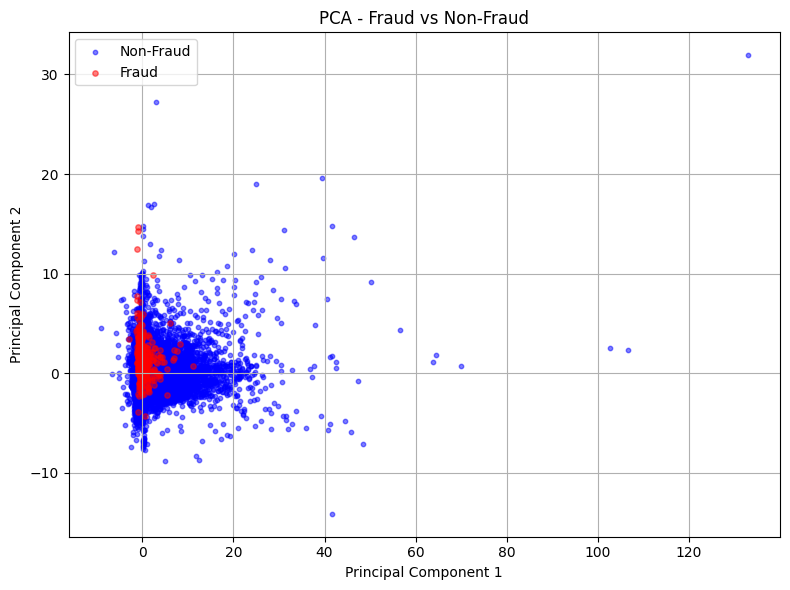

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = [col for col in df.columns if col not in ['Class', 'Time']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

labels = df['Class']
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[labels == 0, 0], X_pca[labels == 0, 1], alpha=0.5, label='Non-Fraud', c='blue', s=10)
plt.scatter(X_pca[labels == 1, 0], X_pca[labels == 1, 1], alpha=0.5, label='Fraud', c='red', s=15)
plt.title("PCA - Fraud vs Non-Fraud")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Preprocessing

1. Feature scaling
2. Train-test split

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Class", "Time"])
y = df["Class"]

scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])

#2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


Logistic Regression - Model Training

In [12]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression model with balanced class weights
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

print("✅ Logistic Regression model trained successfully!")
print(f"Model coefficients shape: {lr_model.coef_.shape}")
print(f"Model intercept: {lr_model.intercept_[0]:.4f}")

# Keep model as 'model' for compatibility with existing code
model = lr_model

✅ Logistic Regression model trained successfully!
Model coefficients shape: (1, 29)
Model intercept: -3.7856


Evaluation & Visualization

1. Metrics
 - AUPRC
 - ROC-AUC
 - F1 Score
 - Precision
 - Recall
 - Classification Report


In [13]:
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score, auc, f1_score, precision_score, recall_score

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_prob)

print("AUPRC:", pr_auc)
print("ROC-AUC:", roc_auc)
print("F1 Score:", f1_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


AUPRC: 0.7049035726912188
ROC-AUC: 0.9648052851763662
F1 Score: 0.10486418193303854
Precision: 0.05577956989247312
Recall: 0.8736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.06      0.87      0.10        95

    accuracy                           0.98     56746
   macro avg       0.53      0.92      0.55     56746
weighted avg       1.00      0.98      0.99     56746



Evalution Using Confusion Matrix

Structure of a Confusion Matrix
For a binary classification problem (like fraud detection), the matrix looks like this:

Predicted: No Fraud (0)	Predicted: Fraud (1)
Actual: No Fraud (0)	True Negative (TN)	False Positive (FP)
Actual: Fraud (1)	False Negative (FN)	True Positive (TP)
🔍 What Each Term Means
True Positive (TP): Model correctly predicted fraud.
True Negative (TN): Model correctly predicted non-fraud.
False Positive (FP): Model incorrectly predicted fraud (false alarm).
False Negative (FN): Model missed a fraud case.
🧠 Why It's Useful
From the confusion matrix, you can calculate key metrics:

Accuracy = (TP + TN) / Total
Precision = TP / (TP + FP)
Recall (Sensitivity) = TP / (TP + FN)
F1 Score = Harmonic mean of precision and recall

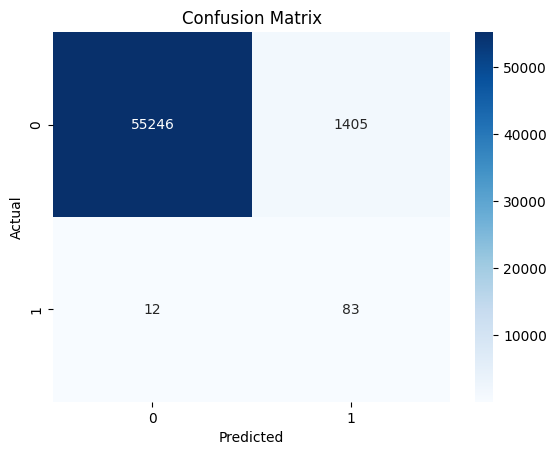

In [14]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


ROC Curve (Receiver Operating Characteristic)
The ROC curve plots:

X-axis: False Positive Rate (FPR) = FP / (FP + TN)
Y-axis: True Positive Rate (TPR) = Recall = TP / (TP + FN)
It shows how well the model distinguishes between classes at various thresholds.

Key Metric: AUC-ROC
AUC (Area Under Curve): Measures the overall ability of the model to distinguish fraud from non-fraud.
AUC = 1.0: Perfect classifier
AUC = 0.5: Random guessing



----

Precision-Recall Curve (Recall Curve)
This curve is especially useful for imbalanced datasets like fraud detection.

X-axis: Recall (TP / TP + FN)
Y-axis: Precision (TP / TP + FP)
It shows the trade-off between catching more frauds (recall) and avoiding false alarms (precision).


Key Metric: AUPRC
AUPRC (Area Under Precision-Recall Curve): Higher is better.
More informative than ROC when the positive class (fraud) is rare.

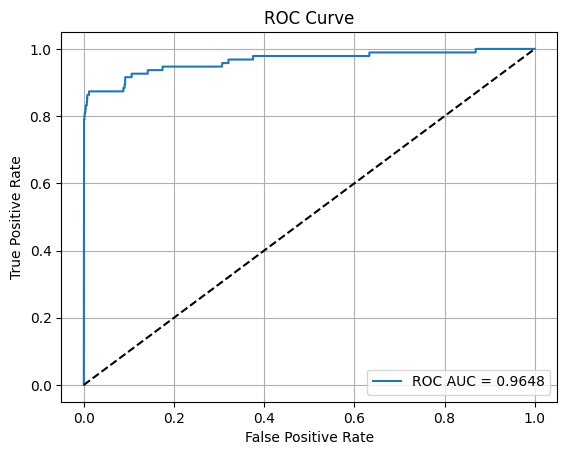

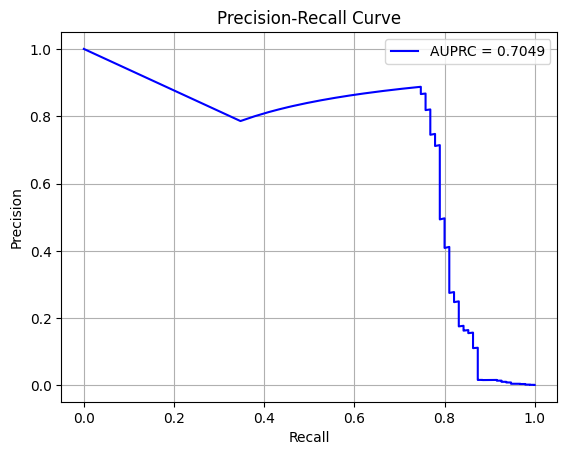

In [15]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
plt.plot(recall, precision, label=f"AUPRC = {pr_auc:.4f}", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


SHAP Values

What Are SHAP Values?
SHAP (SHapley Additive exPlanations) values are a powerful tool for interpreting machine learning models. They explain how much each feature contributed to a particular prediction.

🧠 Intuition Behind SHAP
SHAP is based on game theory — imagine each feature as a "player" in a game, and the model's prediction as the "payout." SHAP calculates how much each feature contributes to the final prediction by considering all possible combinations of features.

📊 What SHAP Tells You
Positive SHAP value: Feature pushes the prediction toward fraud.
Negative SHAP value: Feature pushes the prediction toward non-fraud.
Magnitude: Indicates how strongly the feature influenced the prediction.
📈 Common SHAP Visualizations
Summary Plot: Shows global feature importance and direction of impact.
Force Plot: Visualizes how features push an individual prediction.
Dependence Plot: Shows how a feature’s value affects its SHAP value

c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Setting up SHAP explainer for Logistic Regression...
✅ SHAP values calculated successfully!
SHAP values shape: (50, 29)

Creating SHAP Summary Plot...


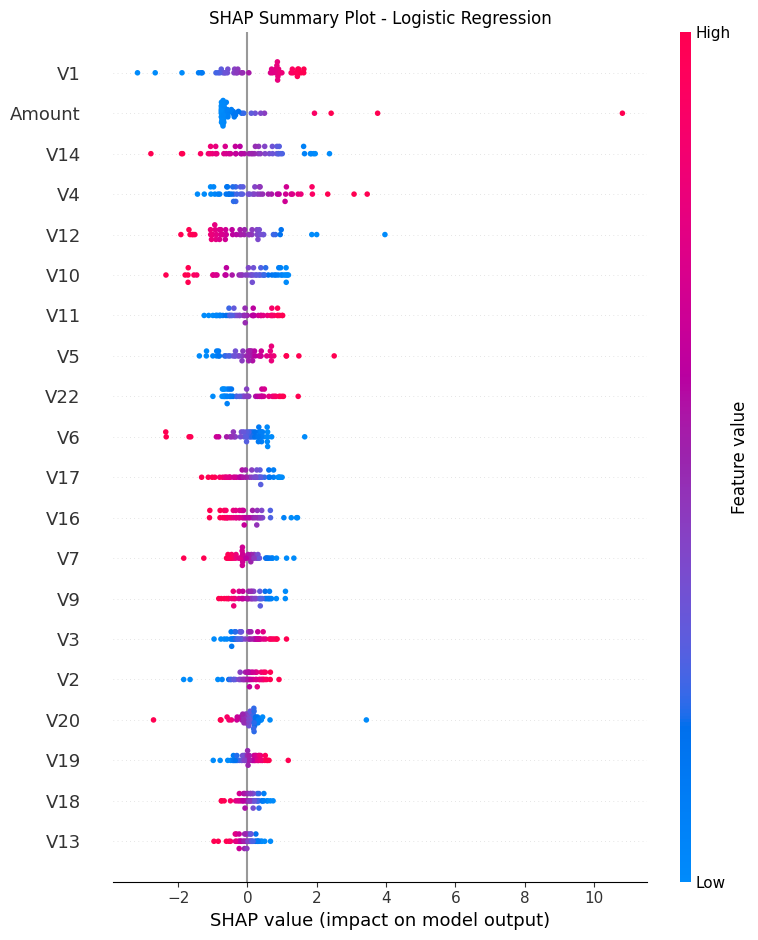


Creating SHAP Feature Importance Plot...


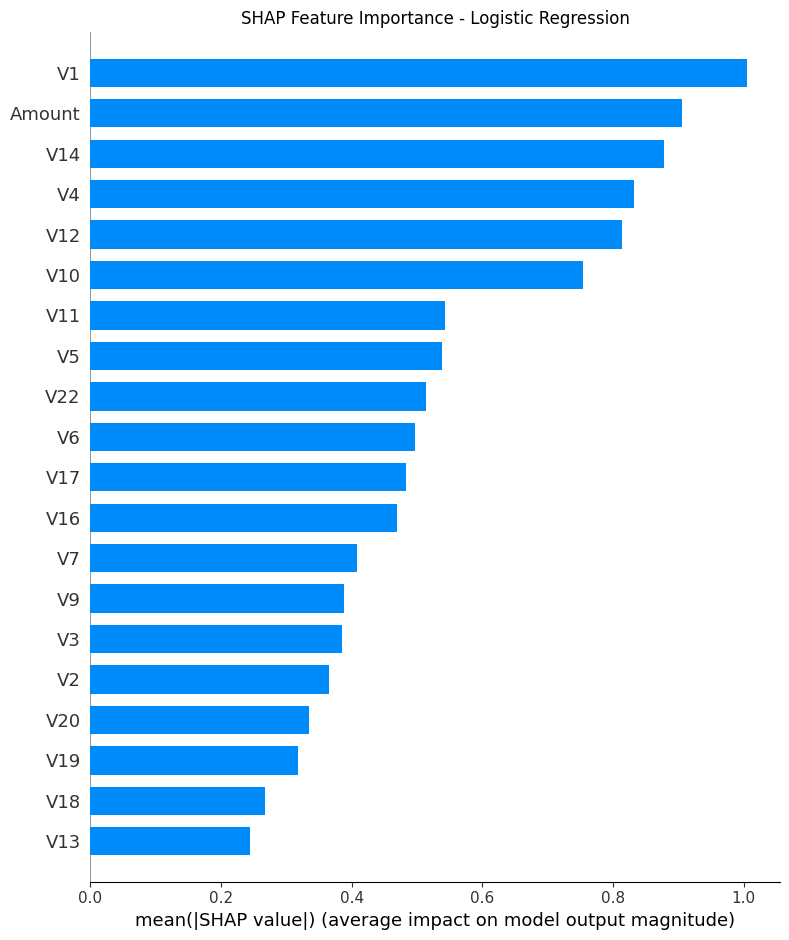

In [16]:
import shap
import matplotlib.pyplot as plt

# Initialize SHAP for Logistic Regression
print("Setting up SHAP explainer for Logistic Regression...")

try:
    # Use a sample of training data as background for faster computation
    background_sample = X_train.sample(min(100, len(X_train)), random_state=42)
    
    # Create explainer for Logistic Regression
    explainer = shap.Explainer(model, background_sample)
    
    # Calculate SHAP values for a subset of test data
    test_sample = X_test.sample(min(50, len(X_test)), random_state=42)
    shap_values = explainer(test_sample)
    
    print("✅ SHAP values calculated successfully!")
    print(f"SHAP values shape: {shap_values.values.shape}")
    
    # Create summary plot
    print("\nCreating SHAP Summary Plot...")
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, test_sample, show=False)
    plt.title("SHAP Summary Plot - Logistic Regression")
    plt.tight_layout()
    plt.show()
    
    # Feature importance plot
    print("\nCreating SHAP Feature Importance Plot...")
    plt.figure(figsize=(10, 6))
    shap.summary_plot(shap_values, test_sample, plot_type="bar", show=False)
    plt.title("SHAP Feature Importance - Logistic Regression")
    plt.tight_layout()
    plt.show()
    
except Exception as e:
    print(f"❌ Error with SHAP analysis: {e}")
    print("Falling back to simpler feature importance...")
    
    # Fallback: Show coefficient-based feature importance
    import pandas as pd
    feature_importance = abs(model.coef_[0])
    feature_names = X_train.columns
    importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    import seaborn as sns
    sns.barplot(data=importance_df.head(15), x='importance', y='feature')
    plt.title("Top 15 Feature Importance (Logistic Regression Coefficients)")
    plt.xlabel("Absolute Coefficient Value")
    plt.tight_layout()
    plt.show()

What is LIME?
LIME (Local Interpretable Model-agnostic Explanations) is a technique used to explain the predictions of any machine learning model by approximating it locally with an interpretable model (like linear regression).

🔍 How LIME Works
Pick a prediction you want to explain (e.g., a fraud prediction).
Perturb the input slightly (create similar samples).
Observe how the model's prediction changes.
Fit a simple model (like linear regression) to approximate the complex model locally.
Show which features contributed most to that specific prediction.

Setting up LIME explainer for Logistic Regression...

--- Sample 1 ---
True Label: Normal
Predicted: Normal
Prediction Probability: 0.0183 (Fraud)
Top features contributing to prediction:
  -0.33 < Amount <= -0.27: -0.0885
  V11 <= -0.76: -0.0663
  V9 > 0.59: -0.0610
  0.14 < V12 <= 0.62: -0.0590
  V18 <= -0.50: 0.0551
  0.02 < V1 <= 1.32: 0.0503
  0.02 < V8 <= 0.33: -0.0294
  -0.07 < V17 <= 0.40: -0.0250
  0.18 < V3 <= 1.03: 0.0234
  V24 <= -0.35: -0.0229

--- Sample 1 ---
True Label: Normal
Predicted: Normal
Prediction Probability: 0.0183 (Fraud)
Top features contributing to prediction:
  -0.33 < Amount <= -0.27: -0.0885
  V11 <= -0.76: -0.0663
  V9 > 0.59: -0.0610
  0.14 < V12 <= 0.62: -0.0590
  V18 <= -0.50: 0.0551
  0.02 < V1 <= 1.32: 0.0503
  0.02 < V8 <= 0.33: -0.0294
  -0.07 < V17 <= 0.40: -0.0250
  0.18 < V3 <= 1.03: 0.0234
  V24 <= -0.35: -0.0229


c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


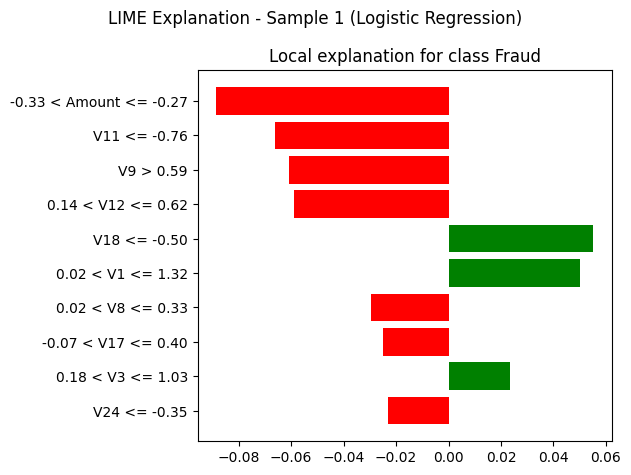

c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



--- Sample 2 ---
True Label: Normal
Predicted: Normal
Prediction Probability: 0.0218 (Fraud)
Top features contributing to prediction:
  V14 > 0.49: -0.1553
  V5 > 0.62: 0.1059
  V7 > 0.57: -0.0899
  Amount <= -0.33: -0.0892
  V11 <= -0.76: -0.0729
  V22 > 0.53: 0.0721
  V2 > 0.80: 0.0565
  -0.85 < V4 <= -0.02: -0.0483
  V28 > 0.08: 0.0310
  -0.54 < V10 <= -0.09: 0.0304
Top features contributing to prediction:
  V14 > 0.49: -0.1553
  V5 > 0.62: 0.1059
  V7 > 0.57: -0.0899
  Amount <= -0.33: -0.0892
  V11 <= -0.76: -0.0729
  V22 > 0.53: 0.0721
  V2 > 0.80: 0.0565
  -0.85 < V4 <= -0.02: -0.0483
  V28 > 0.08: 0.0310
  -0.54 < V10 <= -0.09: 0.0304


c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


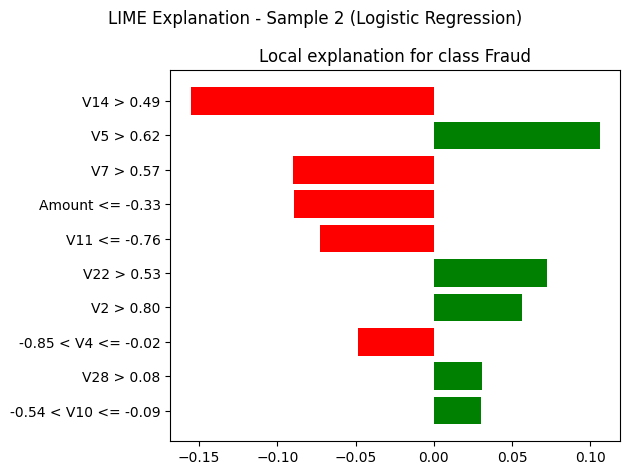

c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(



--- Sample 3 ---
True Label: Normal
Predicted: Normal
Prediction Probability: 0.0071 (Fraud)


c:\Users\Abhilasha\Documents\MTech\study\source_code\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Top features contributing to prediction:
  Amount > -0.04: 0.2446
  V14 <= -0.43: 0.2250
  V4 > 0.74: 0.1518
  V1 <= -0.92: -0.1483
  V17 <= -0.48: 0.1344
  V10 > 0.45: -0.1335
  V5 > 0.62: 0.1106
  V20 > 0.13: -0.0862
  V11 > 0.74: 0.0861
  V6 > 0.40: -0.0751


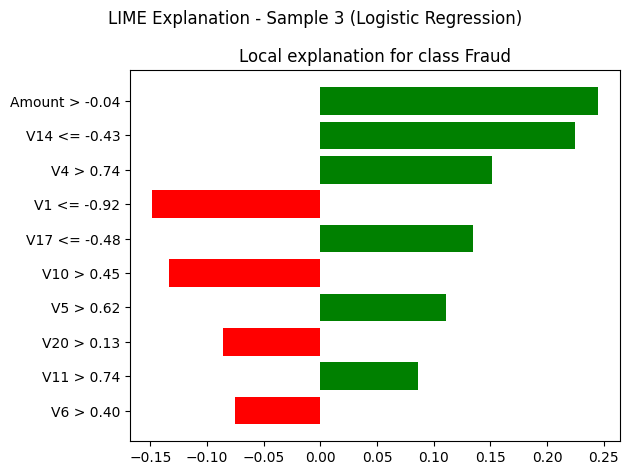

✅ LIME explanations generated successfully!


In [17]:
from lime import lime_tabular
import matplotlib.pyplot as plt

print("Setting up LIME explainer for Logistic Regression...")

try:
    # Create LIME explainer
    explainer = lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=['Normal', 'Fraud'],
        mode='classification',
        discretize_continuous=True
    )
    
    # Explain a few predictions
    sample_indices = [0, 1, 2, 3, 4]  # First 5 test instances
    
    for i, idx in enumerate(sample_indices):
        instance = X_test.iloc[idx]
        true_label = y_test.iloc[idx]
        predicted_label = lr_model.predict([instance])[0]
        predicted_proba = lr_model.predict_proba([instance])[0]
        
        print(f"\n--- Sample {i+1} ---")
        print(f"True Label: {'Fraud' if true_label == 1 else 'Normal'}")
        print(f"Predicted: {'Fraud' if predicted_label == 1 else 'Normal'}")
        print(f"Prediction Probability: {predicted_proba[1]:.4f} (Fraud)")
        
        # Generate explanation
        explanation = explainer.explain_instance(
            instance.values, 
            lr_model.predict_proba,
            num_features=10
        )
        
        # Show explanation in text
        print("Top features contributing to prediction:")
        for feature, weight in explanation.as_list():
            print(f"  {feature}: {weight:.4f}")
        
        # Plot explanation
        fig = explanation.as_pyplot_figure()
        fig.suptitle(f'LIME Explanation - Sample {i+1} (Logistic Regression)', fontsize=12)
        plt.tight_layout()
        plt.show()
        
        if i >= 2:  # Limit to first 3 examples to avoid too much output
            break
    
    print("✅ LIME explanations generated successfully!")
    
except Exception as e:
    print(f"❌ Error with LIME analysis: {e}")
    print("This could be due to package version compatibility.")
    print("\nAlternative: Showing top feature contributions manually...")
    
    # Simple alternative explanation
    sample_instance = X_test.iloc[0]
    feature_contributions = sample_instance * lr_model.coef_[0]
    top_features = abs(feature_contributions).nlargest(10)
    
    print(f"\nFor first test instance:")
    print(f"Predicted probability of fraud: {lr_model.predict_proba([sample_instance])[0][1]:.4f}")
    print("\nTop 10 contributing features:")
    for feature in top_features.index:
        contribution = feature_contributions[feature]
        value = sample_instance[feature]
        print(f"  {feature}: {contribution:.4f} (value: {value:.4f})")